<a href="https://colab.research.google.com/github/ayushtankha/RL---Text-Flappy-Bird-Project/blob/main/RL_individual_assignment_ayushtankha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reinforcement Learning - Text Flappy Bird Assignment

# Author - Ayush Tankha

In [1]:
!pip install git+https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git


  Cloning https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to /tmp/pip-req-build-dsitpfuf
  Running command git clone --filter=blob:none --quiet https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git /tmp/pip-req-build-dsitpfuf
  Resolved https://gitlab-research.centralesupelec.fr/stergios.christodoulidis/text-flappy-bird-gym.git to commit ca2797e9270195313423324c9d0f205f6cbb3d28
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.8/953.8 kB 5.7 MB/s eta 0:00:00
  Created wheel for text-flappy-bird-gym: filename=text_flappy_bird_gym-0.1.1-py3-none-any.whl size=7772 sha256=89e1df1a3dfba2f188579e1c773cdf264768f4095183026a6086558cdd996c10
  Stored in directory: /tmp/pip-ephem-wheel-cache-lmqz_1dt/wheels/41/44/75/c67b96ba782472d8cacb00e3af57e29d1ee3a14f2e95a59ce5
Successfully built text-flappy-bird-gym


In [2]:
%matplotlib inline
import numpy as np
from scipy.stats import sem
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import randn
from scipy import array, newaxis
from IPython.display import clear_output
import os, sys
import gym
import time
import text_flappy_bird_gym
from tqdm import tqdm
import pickle
from collections import defaultdict
from mpl_toolkits.mplot3d import axes3d
import gym

In [3]:
import numpy as np
from collections import defaultdict
import gymnasium as gym
import text_flappy_bird_gym

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Monte Carlo Agent (Hypertuning and Implementation)

In [6]:
import random
from collections import defaultdict

class MonteCarloAgent:
    def __init__(self, n_actions, eps=0.1, gamma=0.99):
        self.n_actions = n_actions
        self.eps = eps
        self.gamma = gamma
        self.q_table = defaultdict(lambda: np.zeros(self.n_actions))
        self.returns = defaultdict(list)

    def choose_action(self, state):
        if random.random() < self.eps:
            return random.choice(range(self.n_actions))
        else:
            return np.argmax(self.q_table[state])

    def learn(self, episode):
        G = 0
        for state, action, reward in reversed(episode):
            G = self.gamma * G + reward
            if not (state, action) in episode[:-1]:
                self.returns[(state, action)].append(G)
                self.q_table[state][action] = np.mean(self.returns[(state, action)])

    def calculate_state_value_function(self):
        v_table = defaultdict(float)
        for state, actions in self.q_table.items():
            v_table[state] = np.max(actions)
        return v_table

def train_agent(agent, env, n_episodes):
    rewards = []
    scores = []
    for episode_num in tqdm(range(n_episodes)):
        episode = []
        total_reward = 0
        state = env.reset()
        done = False

        while not done:
            action = agent.choose_action(str(state))
            next_state, reward, done, info = env.step(action)
            episode.append((str(state), action, reward))
            state = next_state
            total_reward += reward

        agent.learn(episode)
        rewards.append(total_reward)
        scores.append(info['score'])

    v_table = agent.calculate_state_value_function()
    return rewards, v_table, scores

# Visualization functions remain the same as previously described


100%|██████████| 10000/10000 [00:12<00:00, 833.05it/s]


{'eps': 0.01, 'gamma': 0.99} [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 5, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 6, 4, 5, 5, 4, 4, 4, 4, 5, 4, 4, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 6, 4, 4, 4, 4, 5, 4, 5, 4, 4, 4, 5, 4, 4, 6, 4, 5, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4

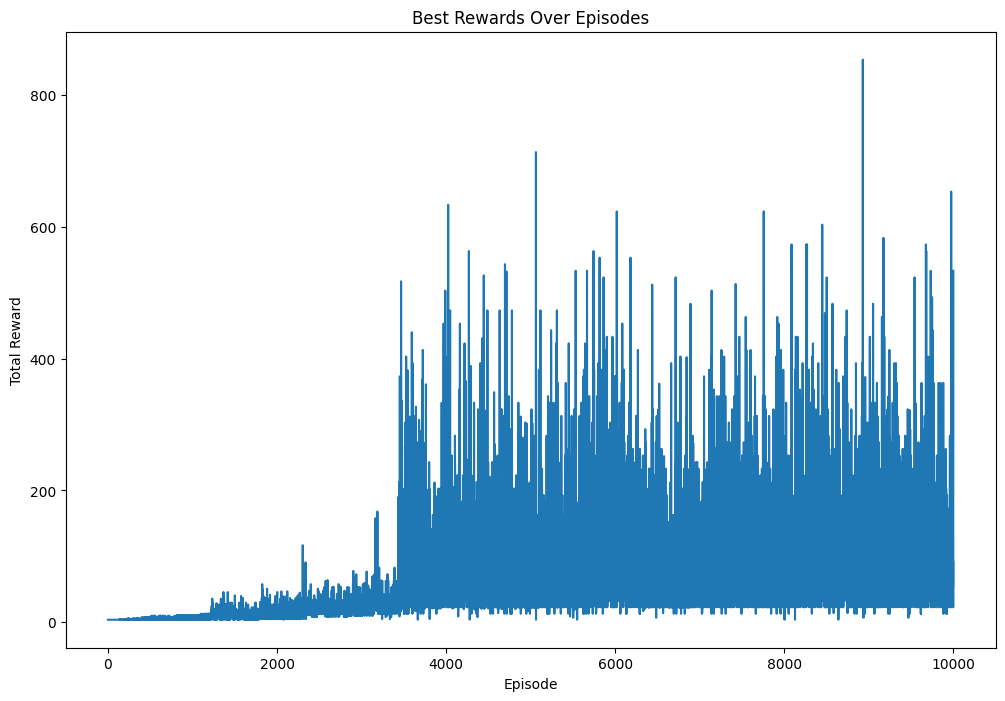

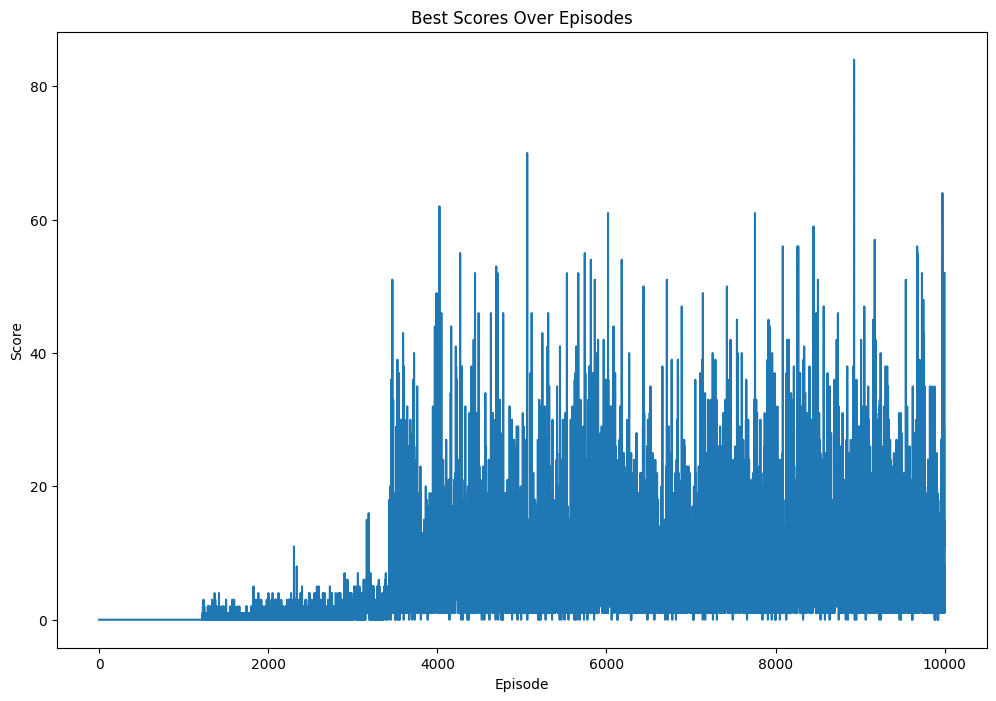

In [7]:
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
from tqdm import tqdm
from itertools import product

class MonteCarloAgent:
    def __init__(self, n_actions, eps=0.1, gamma=0.99):
        self.n_actions = n_actions
        self.eps = eps
        self.gamma = gamma
        self.q_table = defaultdict(lambda: np.zeros(n_actions))
        self.returns = defaultdict(list)

    def choose_action(self, state):
        if np.random.rand() < self.eps:
            return np.random.choice(self.n_actions)
        else:
            return np.argmax(self.q_table[state])

    def learn(self, episode):
        G = 0
        for state, action, reward in reversed(episode):
            G = self.gamma * G + reward
            sa_pair = (state, action)
            if sa_pair not in self.returns:
                self.returns[sa_pair].append(G)
                self.q_table[state][action] = np.mean(self.returns[sa_pair])

    def calculate_state_value_function(self):
        v_table = {state: np.max(actions) for state, actions in self.q_table.items()}
        return v_table

def train_agent(agent, env, n_episodes):
    rewards = []
    scores = []
    for _ in tqdm(range(n_episodes)):
        episode = []
        total_reward = 0
        state = env.reset()
        done = False

        while not done:
            action = agent.choose_action(str(state))
            next_state, reward, done,_, info = env.step(action)
            episode.append((str(state), action, reward))
            state = next_state
            total_reward += reward

        agent.learn(episode)
        rewards.append(total_reward)
        scores.append(info['score'])

    v_table = agent.calculate_state_value_function()
    return rewards, v_table, scores

def plot_graphs(data, title, xlabel, ylabel):
    plt.figure(figsize=(12, 8))
    plt.plot(data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def hyperparameter_tuning(env, n_episodes, eps_values, gamma_values):
    best_score = -np.inf
    best_params = {}
    best_v_table = {}
    best_rewards = []
    best_scores = []

    for eps, gamma in product(eps_values, gamma_values):
        agent = MonteCarloAgent(env.action_space.n, eps=eps, gamma=gamma)
        rewards, v_table, scores = train_agent(agent, env, n_episodes)

        average_score = np.mean(scores[-100:])  # Last 100 episodes
        if average_score > best_score:
            best_score = average_score
            best_params = {'eps': eps, 'gamma': gamma}
            best_v_table = v_table
            best_rewards = rewards
            best_scores = scores

    return best_params, best_v_table, best_rewards, best_scores

# Hyperparameters
eps_values = [0.1, 0.05, 0.01]
gamma_values = [0.99, 0.95, 0.9]

# Environment setup
env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)
n_episodes = 10000

# Hyperparameter tuning
best_params, best_v_table, best_rewards, best_scores = hyperparameter_tuning(env, n_episodes, eps_values, gamma_values)
print(best_params,best_rewards, best_scores)
# Plot the performance and state-value function
plot_graphs(best_rewards, 'Best Rewards Over Episodes', 'Episode', 'Total Reward')
plot_graphs(best_scores, 'Best Scores Over Episodes', 'Episode', 'Score')

# You would define plot_state_value_function_3d based on previous discussions.
# plot_state_value_function_3d(best_v_table, 'Best State-Value Function')


In [8]:
best_v_table

{"((13, -5), {'score': 0, 'player': [6, 7], 'distance': 13.92838827718412})": 3.9403989999999998,
 '(12, -5)': 22.995685419484467,
 '(11, -3)': 3.9403989999999998,
 '(10, 1)': 6.793465209301,
 "((13, -1), {'score': 0, 'player': [6, 7], 'distance': 13.038404810405298})": 3.9403989999999998,
 '(12, -1)': 9.561792499119552,
 '(11, 1)': 1.99,
 '(10, 5)': 1.0,
 "((13, 4), {'score': 0, 'player': [6, 7], 'distance': 13.601470508735444})": 70.95115056900357,
 '(12, 4)': 3.9403989999999998,
 '(11, 6)': 3.9403989999999998,
 '(10, 10)': 1.0,
 "((13, 3), {'score': 0, 'player': [6, 7], 'distance': 13.341664064126334})": 3.9403989999999998,
 '(12, 3)': 40.70335535985003,
 '(11, 5)': 3.9403989999999998,
 '(10, 9)': 1.0,
 "((13, -4), {'score': 0, 'player': [6, 7], 'distance': 13.601470508735444})": 5.8519850599,
 '(12, -4)': 68.51908268190475,
 '(11, -2)': 3.9403989999999998,
 '(10, 2)': 4.90099501,
 "((13, 2), {'score': 0, 'player': [6, 7], 'distance': 13.152946437965905})": 22.21786406008532,
 '(12,

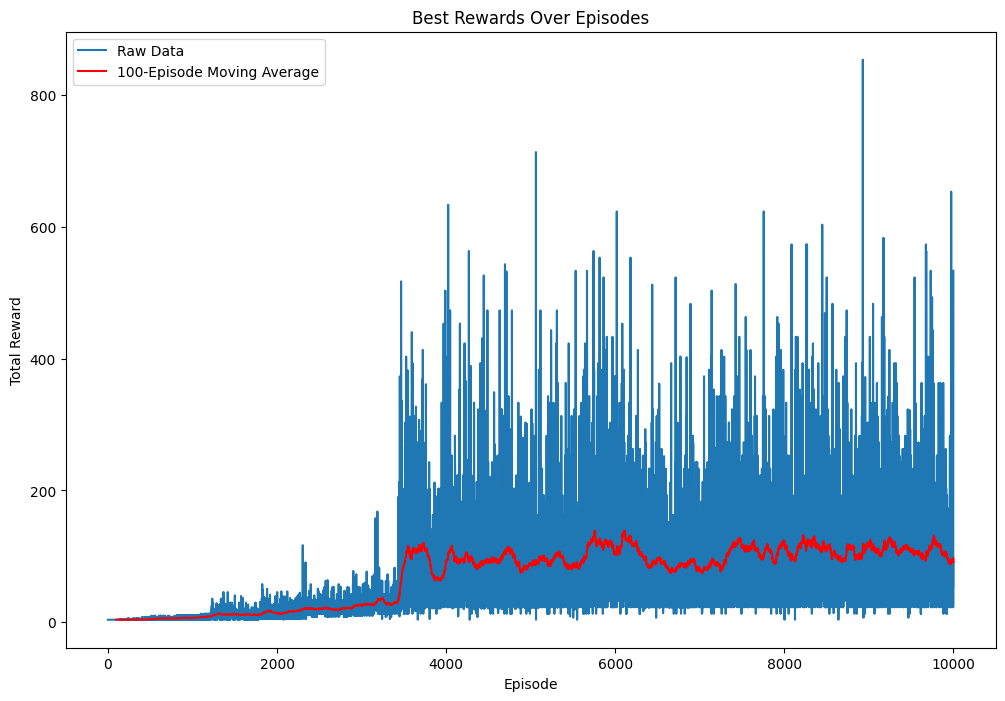

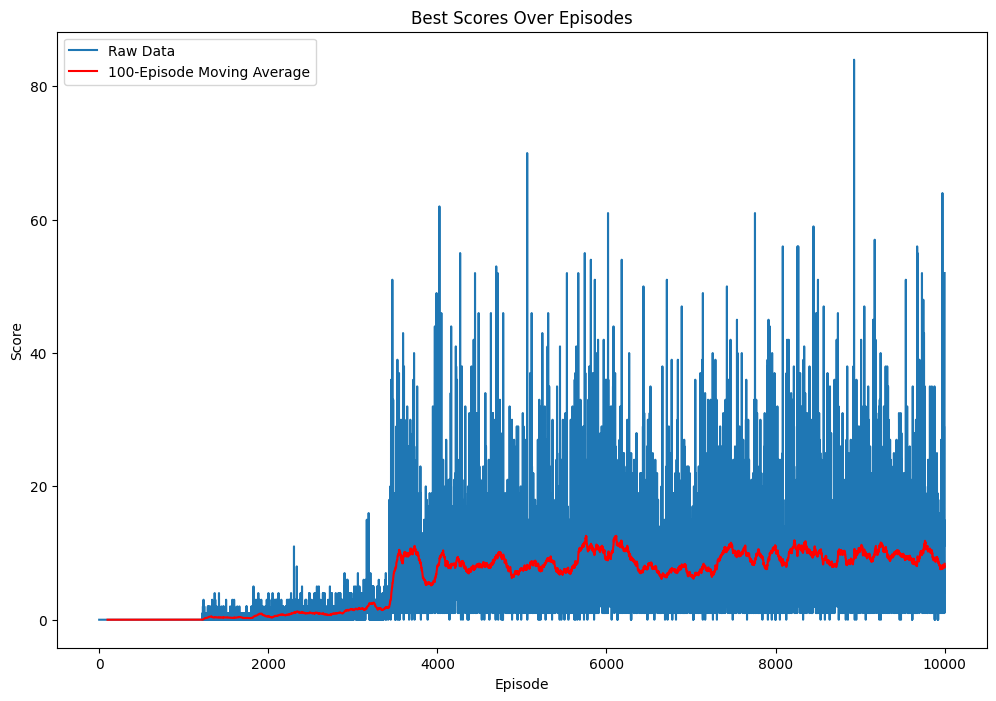

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_graphs(data, title, xlabel, ylabel, window_size=100):
    plt.figure(figsize=(12, 8))
    plt.plot(data, label='Raw Data')

    # Calculate the moving average
    if len(data) > window_size:
        moving_average = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
        plt.plot(np.arange(window_size-1, len(data)), moving_average, label=f'{window_size}-Episode Moving Average', color='red')

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

plot_graphs(best_rewards, 'Best Rewards Over Episodes', 'Episode', 'Total Reward')
plot_graphs(best_scores, 'Best Scores Over Episodes', 'Episode', 'Score')


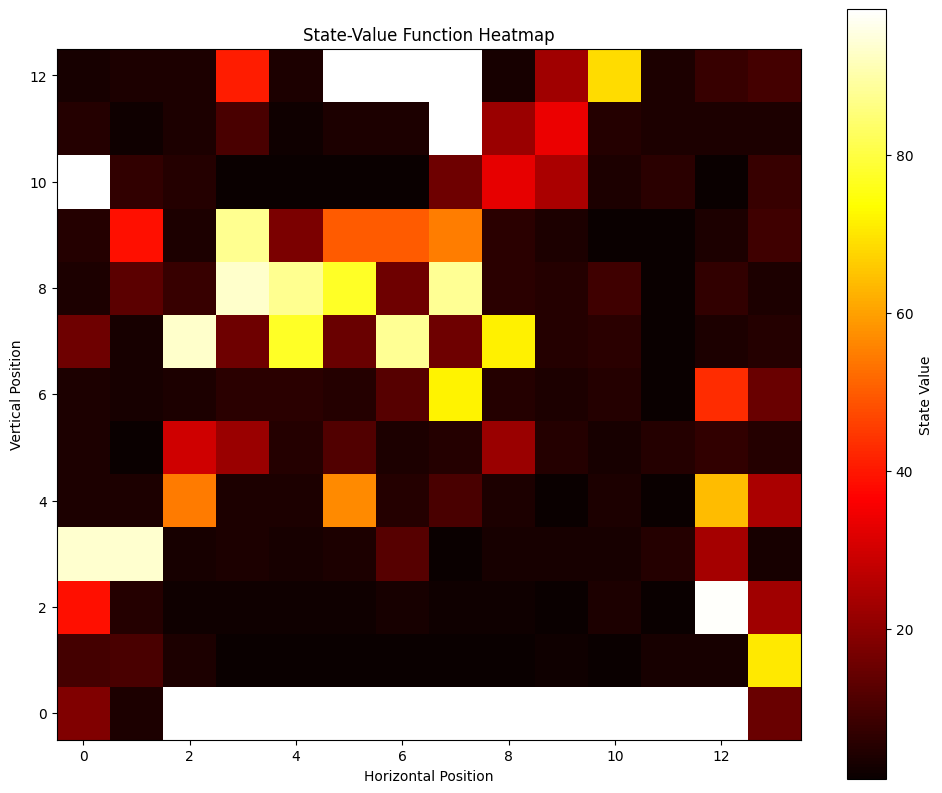

In [27]:
def parse_state(state):
    """Parse the state string to extract or calculate representative x and y coordinates."""
    try:
        if isinstance(eval(state), tuple):
            coords, info = eval(state)
            x, y = coords
            return int(y), int(x)
    except:
        y, x = eval(state)
        return int(y), int(x)
    # If parsing fails, returning a default value
    return 0, 0

def prepare_heatmap_data(v_table):
    """Convert the state-value table into a format suitable for heatmap plotting."""
    data = {}
    for state, value in v_table.items():
        y, x = parse_state(state)
        if (y, x) not in data:
            data[(y, x)] = []
        data[(y, x)].append(value)

    # Average values for each coordinate
    heatmap_data = {coords: np.mean(values) for coords, values in data.items()}
    return heatmap_data

v_table_data = prepare_heatmap_data(best_v_table)

def plot_state_value_function_2d(heatmap_data, title, x_label, y_label):
    # Extracting all coordinates and values
    xs = [coords[1] for coords in heatmap_data.keys()]
    ys = [coords[0] for coords in heatmap_data.keys()]
    values = [value for value in heatmap_data.values()]

    max_x = max(xs) + 1
    max_y = max(ys) + 1
    grid = np.full((max_y, max_x), np.nan)

    for (y, x), value in heatmap_data.items():
        grid[y, x] = value

    # Plotting the heatmap
    plt.figure(figsize=(12, 10))
    plt.imshow(grid, origin='lower', cmap='hot', interpolation='nearest')
    plt.colorbar(label='State Value')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

plot_state_value_function_2d(v_table_data, 'State-Value Function Heatmap', 'Horizontal Position', 'Vertical Position')


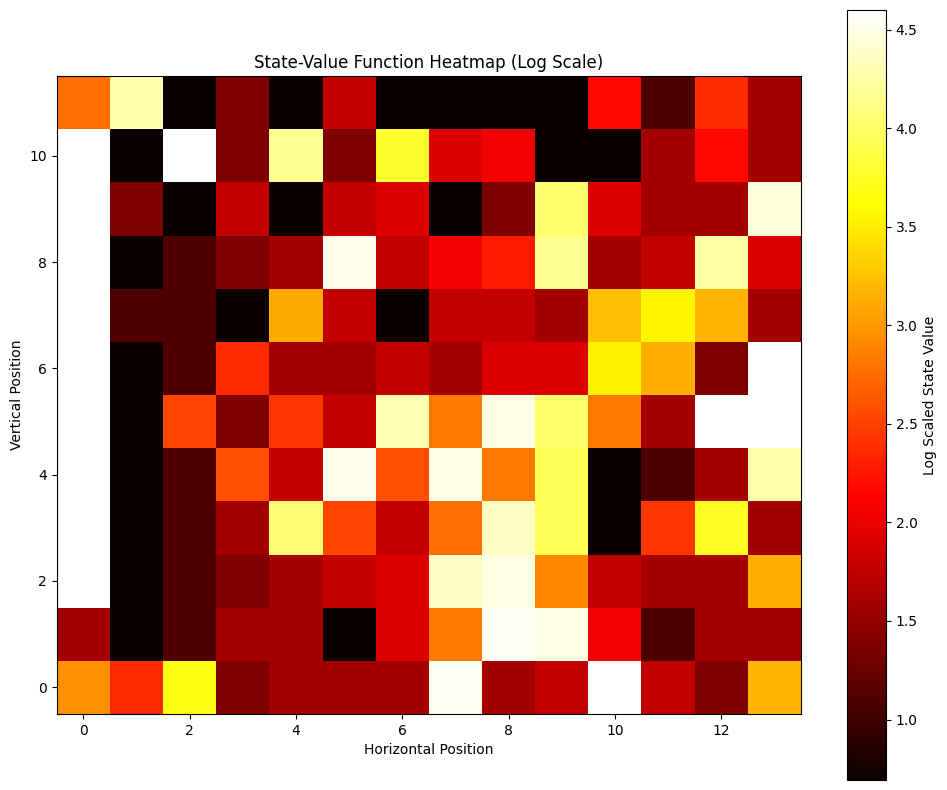

In [29]:
import numpy as np

# Modifying the plot function to use logarithmic scaling
def plot_state_value_function_2d_log(heatmap_data, title, x_label, y_label):
    xs = [coords[0] for coords in heatmap_data.keys()]
    ys = [coords[1] for coords in heatmap_data.keys()]
    values = [value for value in heatmap_data.values()]

    max_x = max(xs) + 1
    max_y = max(ys) + 1
    grid = np.full((max_y, max_x), np.nan)

    for (x, y), value in heatmap_data.items():
        if y < max_y and x < max_x:
            grid[y, x] = np.log1p(value)  # log1p for handling zero values smoothly

    plt.figure(figsize=(12, 10))
    plt.imshow(grid, origin='lower', cmap='hot', interpolation='nearest')
    plt.colorbar(label='Log Scaled State Value')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

plot_state_value_function_2d_log(v_table_data, 'State-Value Function Heatmap (Log Scale)', 'Horizontal Position', 'Vertical Position')


In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_state_value_function_3d(v_table, title='State-Value Function'):
    x_list, y_list, z_list = [], [], []

    for state_str, value in v_table.items():
        try:
            if isinstance(state_str, str):
                state_eval = eval(state_str)
                if isinstance(state_eval, tuple) and len(state_eval) == 2 and all(isinstance(i, int) for i in state_eval):
                    x, y = state_eval
                else:
                    print(f"Skipping state {state_str} due to unexpected format.")
                    continue
            elif isinstance(state_str, tuple) and len(state_str) == 2:
                x, y = state_str
            else:
                print(f"Skipping state {state_str} due to unexpected format.")
                continue
        except Exception as e:
            print(f"Error processing state {state_str}: {e}")
            continue

        x_list.append(x)
        y_list.append(y)
        z_list.append(value)

    if not x_list or not y_list or not z_list:
        print("Insufficient data for plotting.")
        return

    # Convert lists to numpy arrays
    x_arr = np.array(x_list)
    y_arr = np.array(y_list)
    z_arr = np.array(z_list)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(x_arr, y_arr, z_arr, c=z_arr, cmap='hot', depthshade=True)

    ax.set_title(title)
    ax.set_xlabel('X Component')
    ax.set_ylabel('Y Component')
    ax.set_zlabel('State Value')
    plt.colorbar(scatter, label='State Value')
    plt.show()


Skipping state ((13, -5), {'score': 0, 'player': [6, 7], 'distance': 13.92838827718412}) due to unexpected format.
Skipping state ((13, -1), {'score': 0, 'player': [6, 7], 'distance': 13.038404810405298}) due to unexpected format.
Skipping state ((13, 4), {'score': 0, 'player': [6, 7], 'distance': 13.601470508735444}) due to unexpected format.
Skipping state ((13, 3), {'score': 0, 'player': [6, 7], 'distance': 13.341664064126334}) due to unexpected format.
Skipping state ((13, -4), {'score': 0, 'player': [6, 7], 'distance': 13.601470508735444}) due to unexpected format.
Skipping state ((13, 2), {'score': 0, 'player': [6, 7], 'distance': 13.152946437965905}) due to unexpected format.
Skipping state ((13, 1), {'score': 0, 'player': [6, 7], 'distance': 13.038404810405298}) due to unexpected format.
Skipping state ((13, 0), {'score': 0, 'player': [6, 7], 'distance': 13.0}) due to unexpected format.
Skipping state ((13, -3), {'score': 0, 'player': [6, 7], 'distance': 13.341664064126334}) du

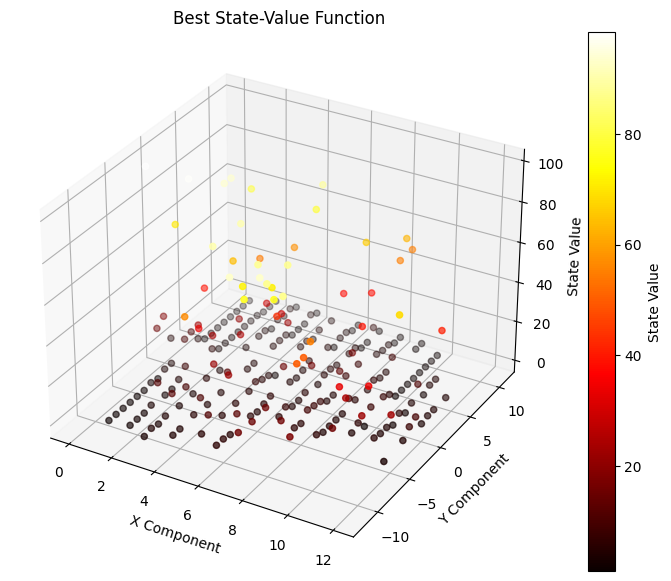

In [32]:
plot_state_value_function_3d(best_v_table, 'Best State-Value Function')


# SARSA LAMBDA (best hyper parameters)

In [21]:
class SarsaLambdaAgent:
    def __init__(self, n_actions, eps=0.2, alpha=0.5, gamma=0.99, lambd=0.8):
        self.eps = eps
        self.alpha = alpha
        self.gamma = gamma
        self.lambd = lambd
        self.n_actions = n_actions
        self.q_table = defaultdict(lambda: np.zeros(n_actions))
        self.e_table = defaultdict(lambda: np.zeros(n_actions))  # Eligibility traces

    def choose_action(self, state):
        if np.random.rand() < self.eps:
            return np.random.choice(self.n_actions)
        else:
            return np.argmax(self.q_table[state])

    def learn(self, state, action, reward, next_state, next_action, done):
        predict = self.q_table[state][action]
        target = reward + self.gamma * self.q_table[next_state][next_action] * (not done)
        td_error = target - predict

        # Increment the eligibility trace for the visited state-action pair
        self.e_table[state][action] += 1

        # Update Q-values and decay eligibility traces for all state-action pairs
        for s, actions in self.q_table.items():
            for a in range(len(actions)):
                self.q_table[s][a] += self.alpha * td_error * self.e_table[s][a]
                self.e_table[s][a] *= self.gamma * self.lambd

    def reset_e_table(self):
        self.e_table = defaultdict(lambda: np.zeros(self.n_actions))

    def calculate_state_value_function(self):
        """Calculates the state-value function from the agent's Q-table."""
        v_table = defaultdict(float)
        for state, actions in self.q_table.items():
            v_table[state] = np.max(actions)
        return v_table

100%|██████████| 5000/5000 [02:49<00:00, 29.54it/s]


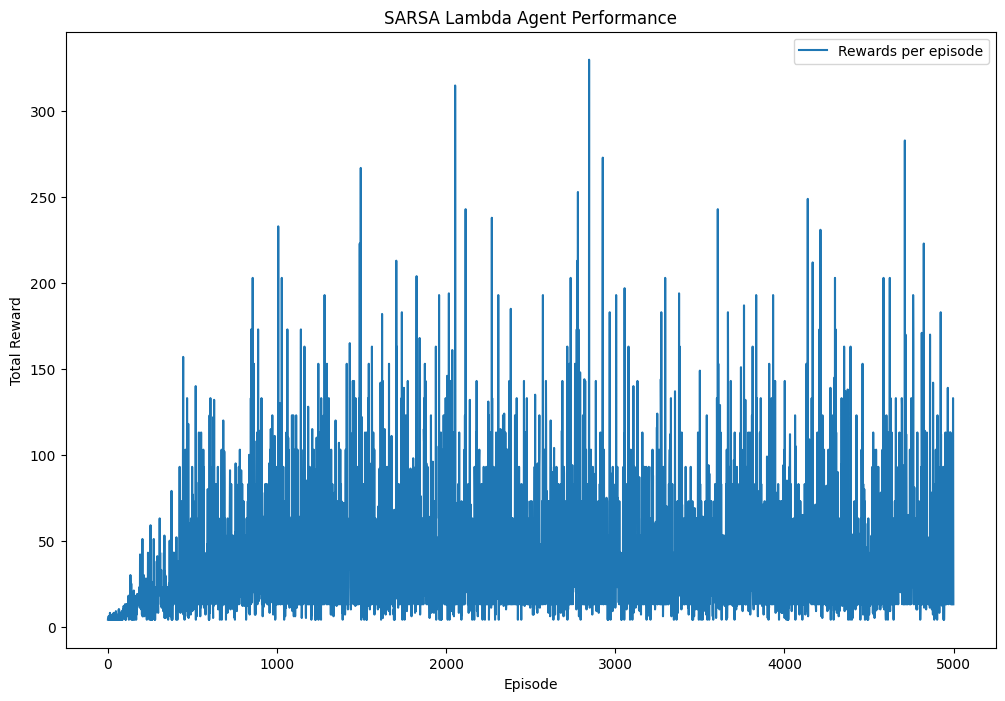

In [22]:
# Training function for SARSA Lambda
env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)
n_episodes = 5000
def train_sarsa_lambda_agent(agent, n_episodes):
    rewards = []
    scores = []
    for episode in tqdm(range(n_episodes)):
        total_reward = 0
        state = env.reset()
        done = False
        action = agent.choose_action(str(state))

        agent.reset_e_table()  # Reset eligibility traces for the new episode

        while not done:
            next_state, reward, done, _, info = env.step(action)
            next_action = agent.choose_action(str(next_state))
            agent.learn(str(state), action, reward, str(next_state), next_action, done)
            state = next_state
            action = next_action
            total_reward += reward


        scores.append(info['score'])
        rewards.append(total_reward)
    v_table = agent.calculate_state_value_function()
    return rewards, v_table, scores

# Initialize and train SARSA Lambda agent
sarsa_lambda_agent = SarsaLambdaAgent(env.action_space.n)
sarsa_lambda_rewards = train_sarsa_lambda_agent(sarsa_lambda_agent, n_episodes)




# Initialize and train SARSA Lambda agent
sarsa_lambda_agent = SarsaLambdaAgent(env.action_space.n)
sarsa_lambda_rewards, sarsa_lambda_v_table , sarsa_lambda_scores= train_sarsa_lambda_agent(sarsa_lambda_agent, n_episodes)



# Function to plot rewards
def plot_rewards(rewards, title):
    plt.figure(figsize=(12, 8))
    plt.plot(rewards, label='Rewards per episode')
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.show()

# Plot SARSA Lambda agent performance
plot_rewards(sarsa_lambda_rewards, 'SARSA Lambda Agent Performance')



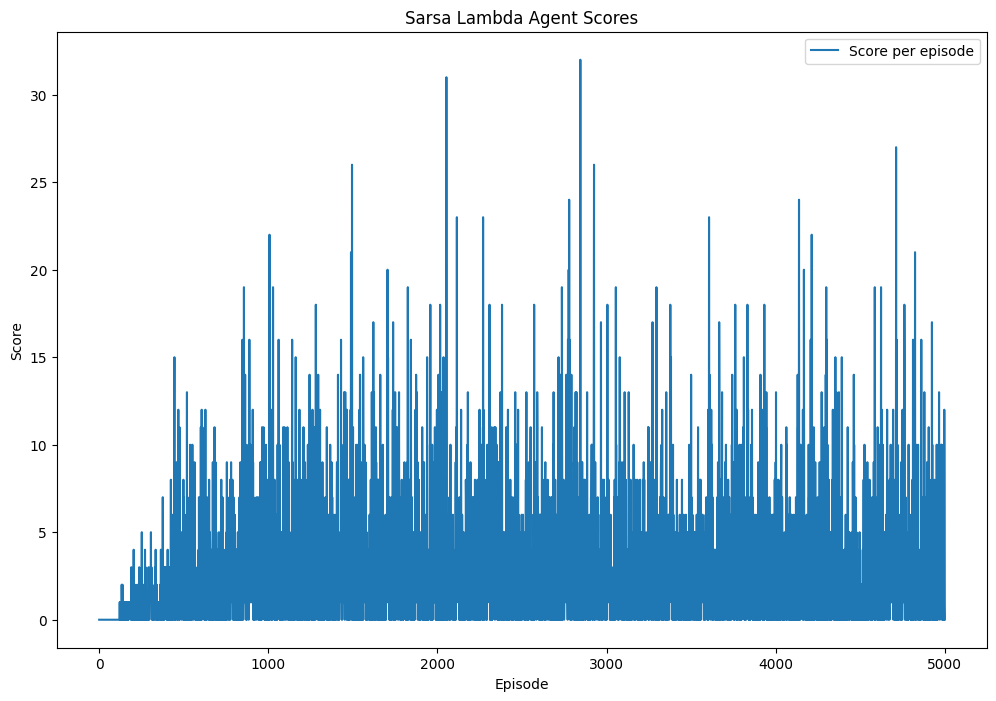

In [25]:
import matplotlib.pyplot as plt

# Assuming mc_scores contains the scores from the Monte Carlo agent after training
# You should have mc_scores as the output from the training function.

def plot_scores(scores, title='Scores Over Episodes'):
    plt.figure(figsize=(12, 8))
    plt.plot(scores, label='Score per episode')
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Score')
    plt.legend()
    plt.show()

# Call the function with your actual scores
plot_scores(sarsa_lambda_scores, 'Sarsa Lambda Agent Scores')


Error processing state ((13, -2), {'score': 0, 'player': [6, 7], 'distance': 13.152946437965905}): cannot unpack non-iterable int object
Error processing state ((13, -4), {'score': 0, 'player': [6, 7], 'distance': 13.601470508735444}): cannot unpack non-iterable int object
Error processing state ((13, 4), {'score': 0, 'player': [6, 7], 'distance': 13.601470508735444}): cannot unpack non-iterable int object
Error processing state ((13, -5), {'score': 0, 'player': [6, 7], 'distance': 13.92838827718412}): cannot unpack non-iterable int object
Error processing state ((13, 1), {'score': 0, 'player': [6, 7], 'distance': 13.038404810405298}): cannot unpack non-iterable int object
Error processing state ((13, -3), {'score': 0, 'player': [6, 7], 'distance': 13.341664064126334}): cannot unpack non-iterable int object
Error processing state ((13, 0), {'score': 0, 'player': [6, 7], 'distance': 13.0}): cannot unpack non-iterable int object
Error processing state ((13, -1), {'score': 0, 'player': [6

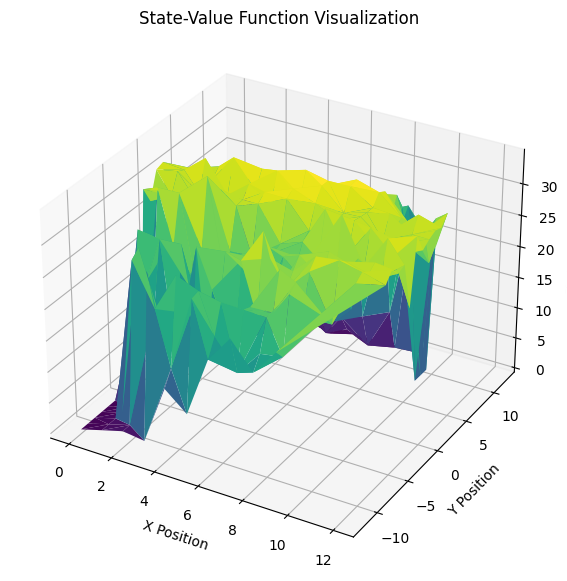

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# Extract x, y for state components and z for the value
x_list = []
y_list = []
z_list = []

for state, value in sarsa_lambda_v_table.items():
    # Handling both simple and complex state strings
    if state.startswith("(("):
        try:
            # Extracting the core tuple part and evaluating
            core_state_str = state.split(", {")[0] + ")"
            core_state = eval(core_state_str)
            x, y = core_state[0]
        except Exception as e:
            print(f"Error processing state {state}: {e}")
            continue
    else:  # Simpler state representations
        try:
            x, y = eval(state)
        except Exception as e:
            print(f"Error processing state {state}: {e}")
            continue

    x_list.append(x)
    y_list.append(y)
    z_list.append(value)

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(x_list, y_list, z_list, cmap='viridis')

ax.set_title('State-Value Function Visualization')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
ax.set_zlabel('State Value')

plt.show()


100%|██████████| 500/500 [00:06<00:00, 77.24it/s]


Best configuration: (0.9, 0.9, 0.1, 0.95)
Best average reward: 42.27


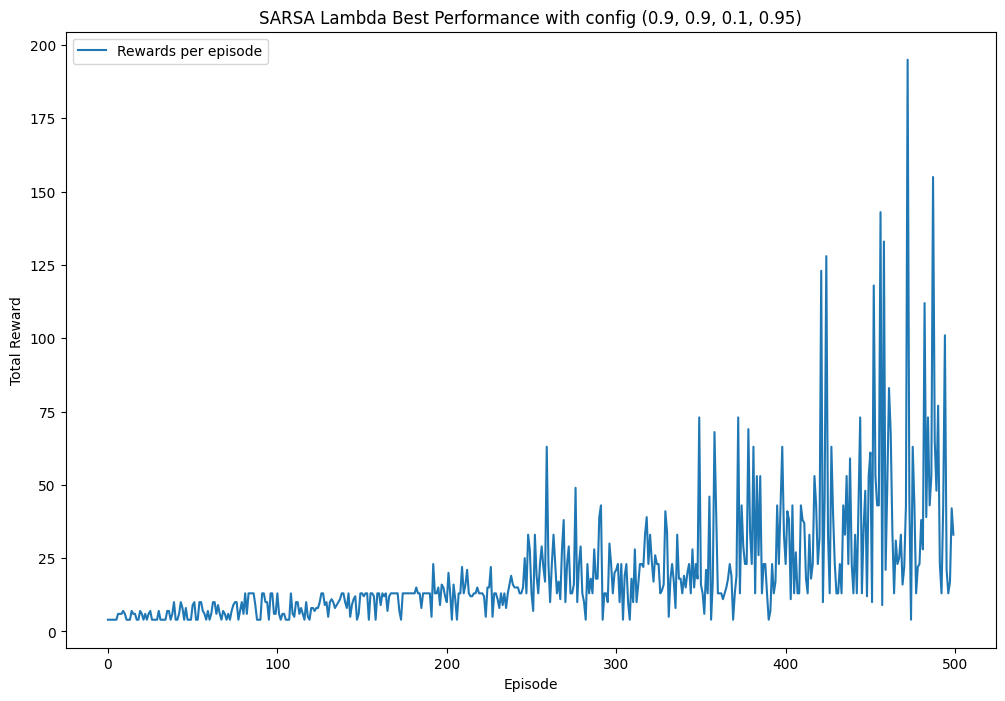

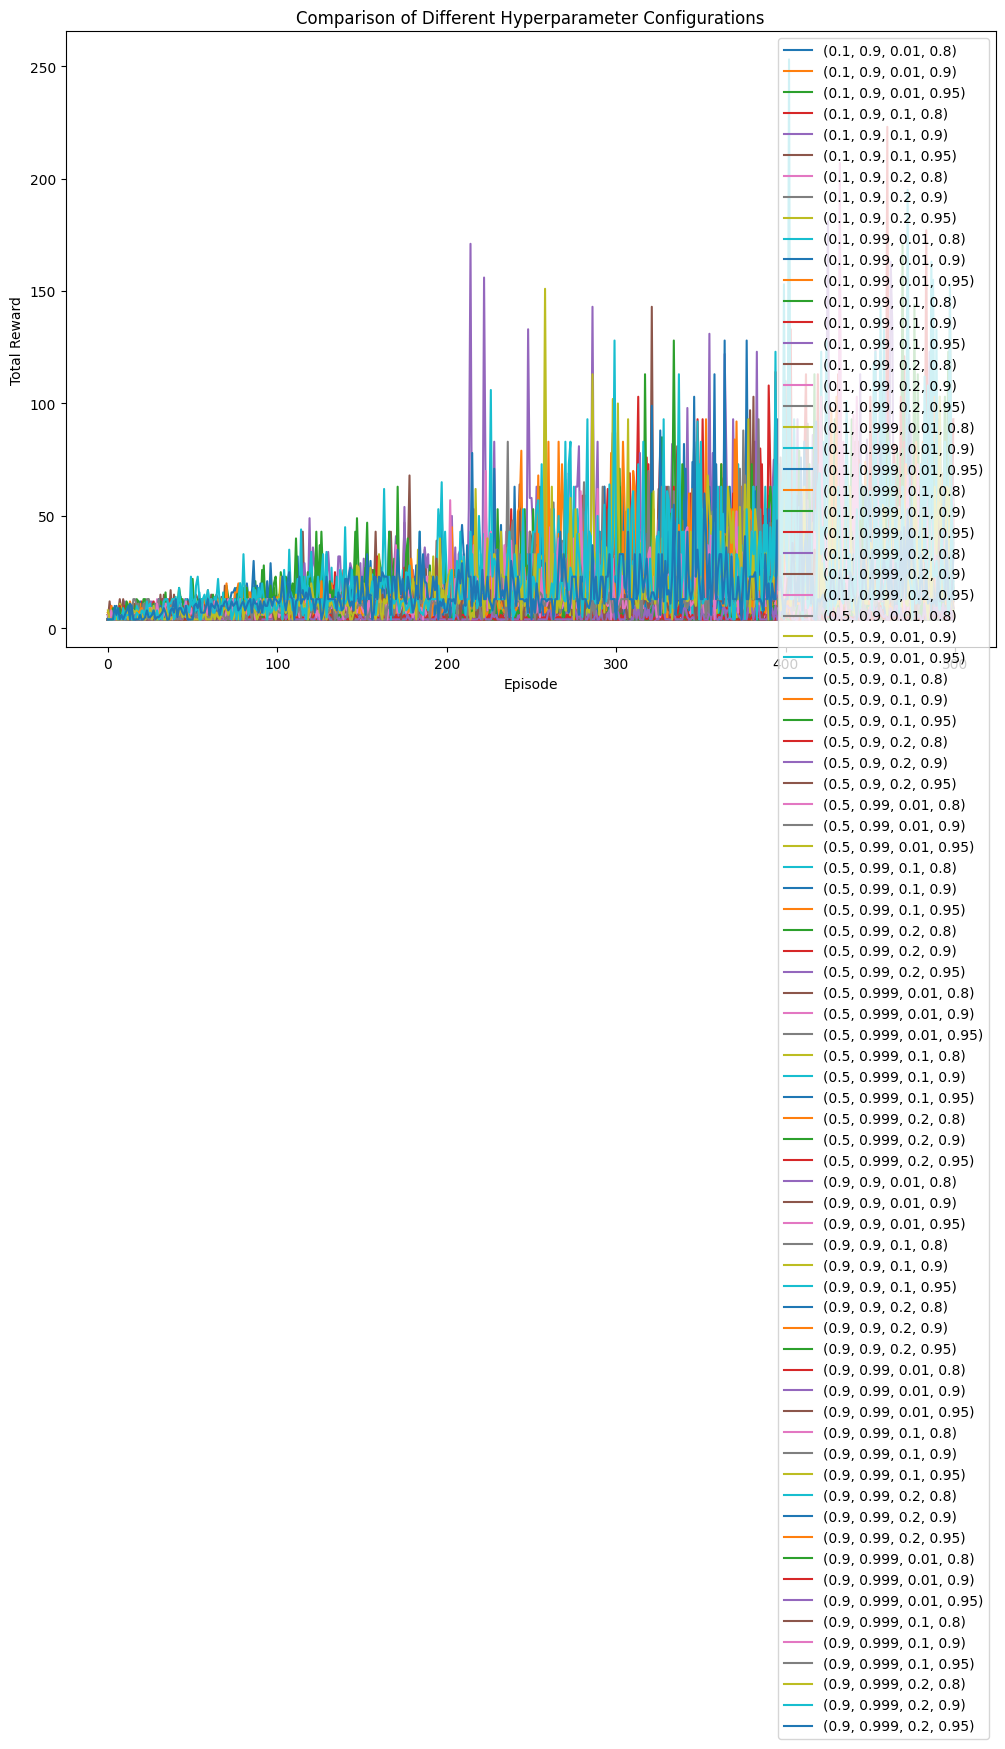

In [17]:
hyperparams = {
    'alpha': [0.1, 0.5, 0.9],
    'gamma': [0.9, 0.99, 0.999],
    'eps': [0.01, 0.1, 0.2],
    'lambd': [0.8, 0.9, 0.95]
}

def hyperparameter_tuning(env, hyperparams, n_episodes=500):
    best_average_reward = -float('inf')
    best_config = None
    all_rewards = {}

    for alpha in hyperparams['alpha']:
        for gamma in hyperparams['gamma']:
            for eps in hyperparams['eps']:
                for lambd in hyperparams['lambd']:
                    config = (alpha, gamma, eps, lambd)
                    agent = SarsaLambdaAgent(env.action_space.n, eps=eps, alpha=alpha, gamma=gamma, lambd=lambd)
                    rewards, _, _ = train_sarsa_lambda_agent(agent, n_episodes)
                    average_reward = np.mean(rewards[-100:])  # we consider the last 100 episodes to determine the best performance
                    all_rewards[config] = rewards
                    if average_reward > best_average_reward:
                        best_average_reward = average_reward
                        best_config = config

    print("Best configuration:", best_config)
    print("Best average reward:", best_average_reward)

    # Plot results for the best configuration
    plot_rewards(all_rewards[best_config], f'SARSA Lambda Best Performance with config {best_config}')

    # Plot convergence over episodes
    plt.figure(figsize=(12, 8))
    for config, rewards in all_rewards.items():
        plt.plot(rewards, label=str(config))
    plt.title('Comparison of Different Hyperparameter Configurations')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.show()

    return best_config, all_rewards[best_config]

# Assuming the environment is defined
#env = gym.make('TextFlappyBird-v0', height=15, width=20, pipe_gap=4)

# Run hyperparameter tuning
best_config, best_rewards = hyperparameter_tuning(env, hyperparams, n_episodes=500)


100%|██████████| 500/500 [00:05<00:00, 93.66it/s]


Best configuration: (0.5, 0.99, 0.2, 0.8)
Best average reward: 37.55


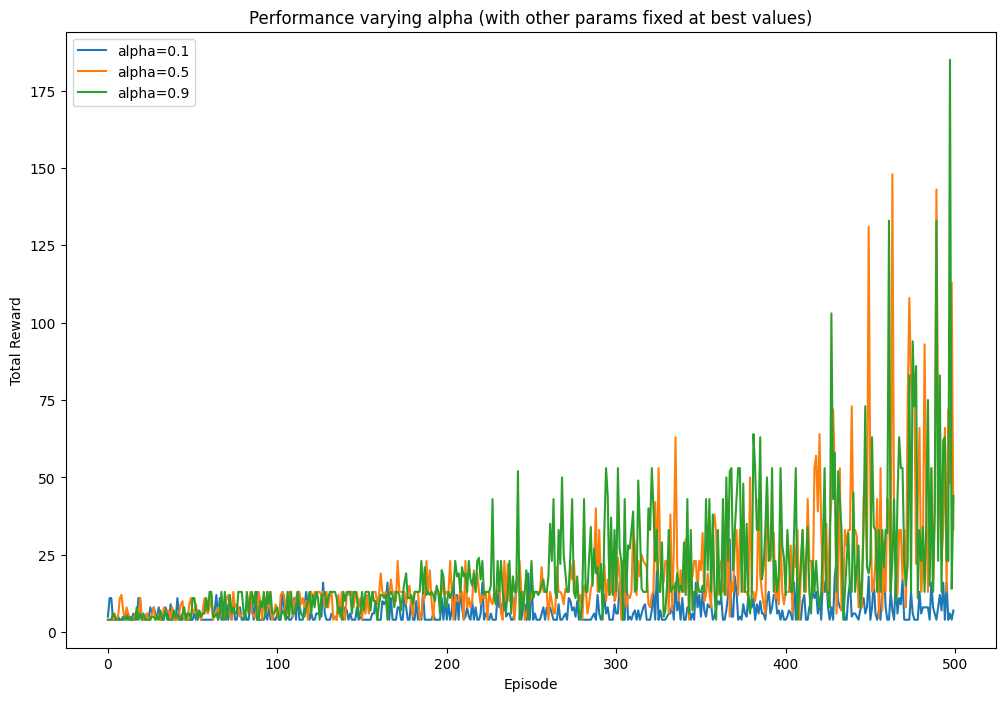

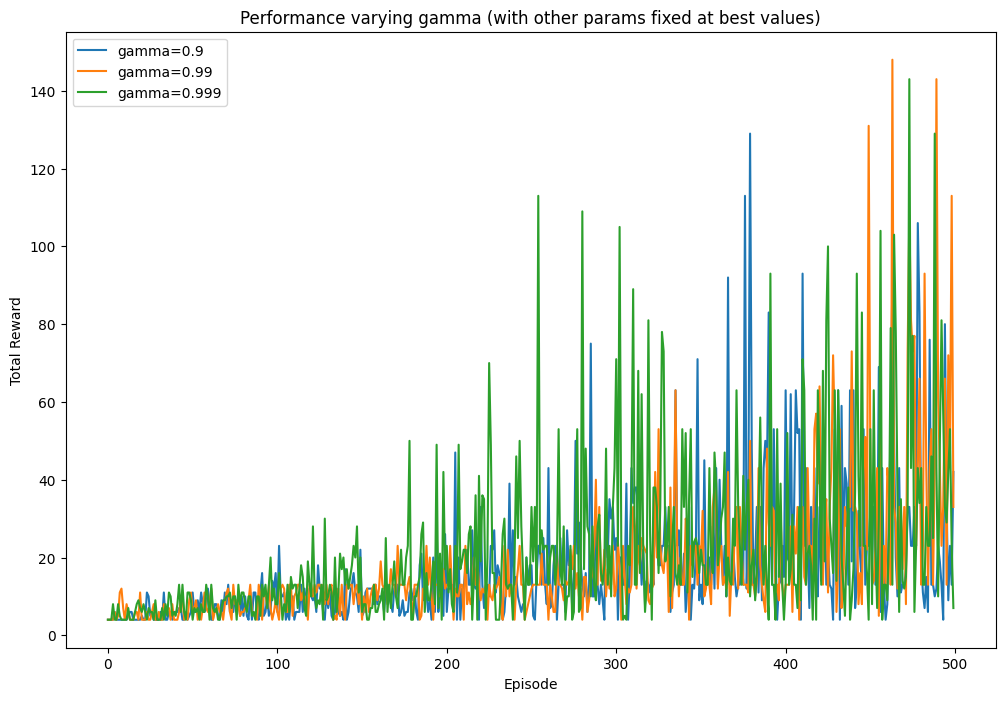

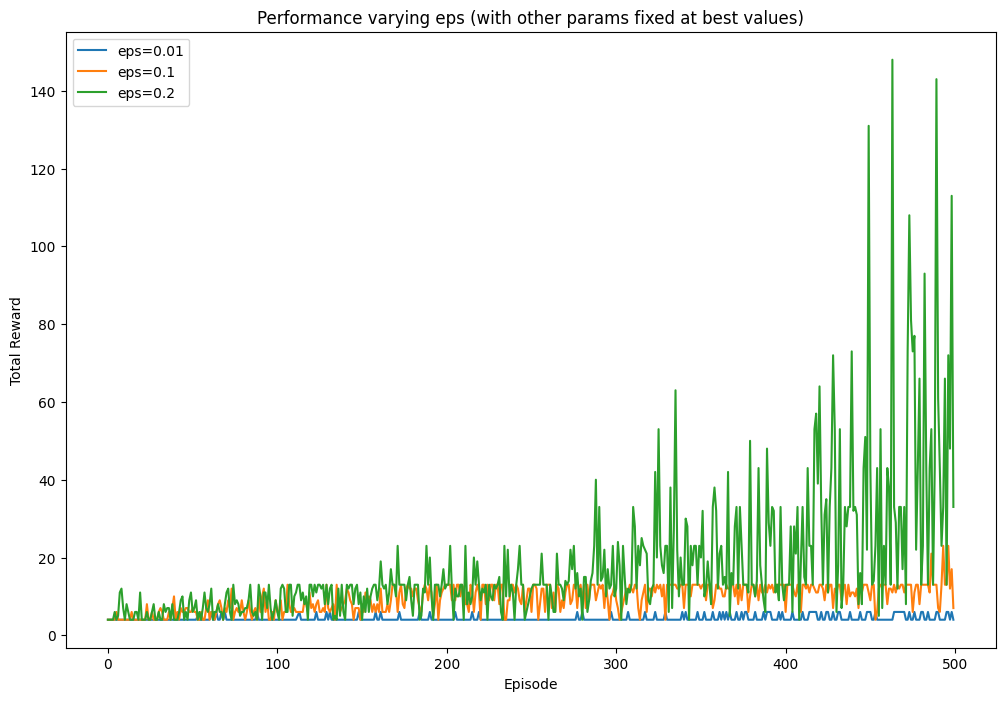

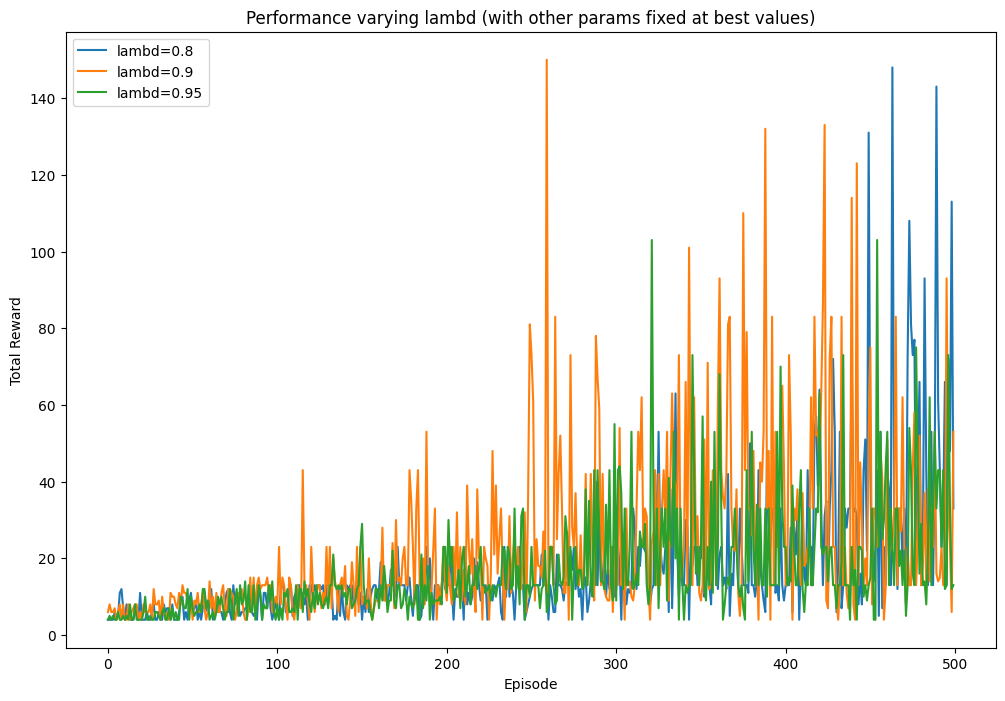

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def plot_rewards_by_hyperparameter(all_rewards, fixed_params, varying_param, param_values, title):
    plt.figure(figsize=(12, 8))
    for value in param_values:
        config = tuple(fixed_params[p] if p != varying_param else value for p in ['alpha', 'gamma', 'eps', 'lambd'])
        if config in all_rewards:
            plt.plot(all_rewards[config], label=f'{varying_param}={value}')
    plt.title(title)
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.show()

# Adjust the hyperparameter tuning function
def hyperparameter_tuning(env, hyperparams, n_episodes=500):
    best_average_reward = -float('inf')
    best_config = None
    all_rewards = {}

    # Store rewards with config as key for easier access
    for alpha in hyperparams['alpha']:
        for gamma in hyperparams['gamma']:
            for eps in hyperparams['eps']:
                for lambd in hyperparams['lambd']:
                    config = (alpha, gamma, eps, lambd)
                    agent = SarsaLambdaAgent(env.action_space.n, eps=eps, alpha=alpha, gamma=gamma, lambd=lambd)
                    rewards, _, _ = train_sarsa_lambda_agent(agent, n_episodes)
                    average_reward = np.mean(rewards[-100:])
                    all_rewards[config] = rewards
                    if average_reward > best_average_reward:
                        best_average_reward = average_reward
                        best_config = config

    # Output best configuration
    print("Best configuration:", best_config)
    print("Best average reward:", best_average_reward)

    # Convert best_config tuple to a dictionary
    keys = ['alpha', 'gamma', 'eps', 'lambd']
    best_config_dict = dict(zip(keys, best_config))

    # Plot for each hyperparameter separately
    for param in keys:
        plot_rewards_by_hyperparameter(
            all_rewards, best_config_dict, param, hyperparams[param],
            f'Performance varying {param} (with other params fixed at best values)'
        )

    return best_config, all_rewards[best_config]


# Run hyperparameter tuning
best_config, best_rewards = hyperparameter_tuning(env, hyperparams, n_episodes=500)


In [35]:
print(best_config)

(0.5, 0.99, 0.2, 0.8)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
